In [45]:
import json

def load_jsonl(f):
    return list(map(lambda x: json.loads(x), open(f).readlines()))

fsrs_6 = load_jsonl("../srs-benchmark/result/FSRS-6.jsonl")
button_usage = load_jsonl("button_usage.jsonl")

users = list(zip(fsrs_6, button_usage))
users = sorted(users, key=lambda u: u[1]["size"])
users[0]

({'metrics': {'RMSE': 0.393138,
   'LogLoss': 0.516497,
   'RMSE(bins)': 0.170836,
   'ICI': 0.087297,
   'AUC': 0.568092},
  'user': 4746,
  'size': 2545,
  'parameters': {'0': [3.5517,
    3.4822,
    3.3673,
    38.0526,
    7.1144,
    0.4855,
    1.9533,
    0.1639,
    1.544,
    0.4117,
    1.0511,
    2.0135,
    0.0402,
    0.5138,
    2.4411,
    0.2941,
    2.8301,
    0.4928,
    0.4605,
    0.3433,
    0.1001]}},
 {'user': 4745,
  'size': 441,
  'first_rating_prob': [0.1122, 0.2143, 0.6735, 0.0],
  'review_rating_prob': [0.1007, 0.7914, 0.1079],
  'learn_costs': [16.31, 180.0, 120.0, 0.0],
  'review_costs': [120.0, 60.0, 60.0, 60.0],
  'first_rating_offset': [-0.09, -0.29, -0.08, 0.0],
  'first_session_len': [0.81, 2.0, 1.08, 0.0],
  'forget_rating_offset': -0.18,
  'forget_session_len': 1.18,
  'short_term_recall': [0.6, 1.0, 0.9841, 0.9836],
  'learning_step_transition': [[2, 1, 2, 1], [0, 5, 29, 1], [1, 12, 58, 10]],
  'relearning_step_transition': [[1, 9, 51, 1], [0, 1

In [46]:
x = [user[1]["size"] for user in users]
y = [user[0]["metrics"]["RMSE(bins)"] for user in users]

[]

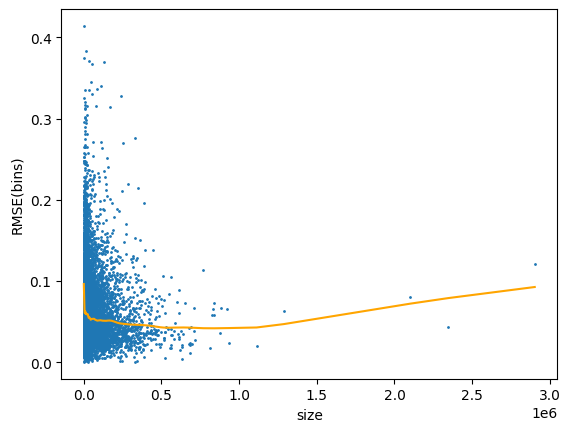

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess
from matplotlib import pyplot as plt
import numpy as np

ax = plt.axes()
bin_size = 1

# https://stackoverflow.com/a/54628145/24162642

#ax.hist([user[1]["true_retention"] for user in users], bins=50)
vals = lowess(y, x, it=3, frac=0.1)
ax.scatter(x, y, s=1)
ax.plot([x[0] for x in vals], [x[1] for x in vals], color="orange")

ax.set_xlabel("size")
ax.set_ylabel("RMSE(bins)")

ax.plot()


[-2.53704806e-20  1.07479231e-13 -9.63576055e-08  6.96589713e-02]


ValueError: endog must be a vector

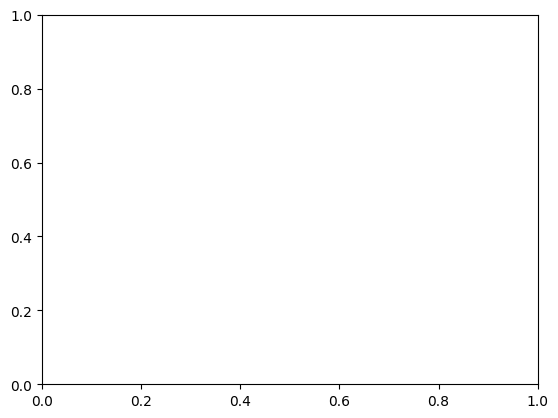

In [48]:
ax = plt.axes()

coefficients = np.polyfit(x, y, 3)
print(coefficients)

def retention_factor(r, x):
    return x - np.polyval(coefficients, r)

adjusted_loss = retention_factor(x, y)

ax.plot(
    x[:10000-bin_size],
    moving_average(
        adjusted_loss,
        bin_size,
    ),
)
ax.set_xlabel("True Retention")
ax.set_ylabel("RMSE - Fit")

ax.plot()

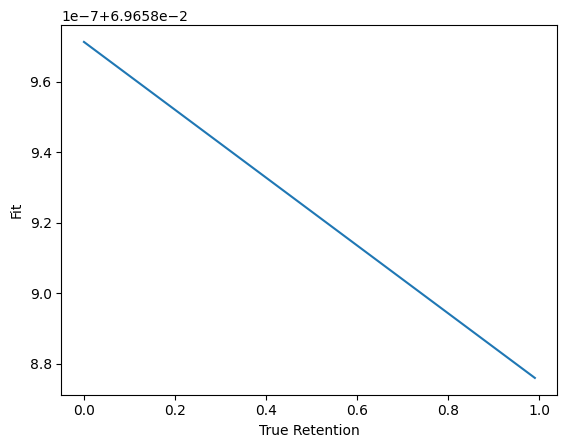

In [15]:
ax = plt.axes()

ax.set_xlabel("True Retention")
ax.set_ylabel("Fit")

ax.plot(np.arange(100) / 100, -retention_factor(np.arange(100) / 100, 0))

(array([6.500e+01, 1.850e+02, 3.830e+02, 7.260e+02, 1.076e+03, 1.147e+03,
        1.172e+03, 1.085e+03, 8.350e+02, 6.580e+02, 5.650e+02, 4.410e+02,
        3.140e+02, 2.670e+02, 1.900e+02, 1.600e+02, 1.400e+02, 1.240e+02,
        8.600e+01, 6.100e+01, 4.900e+01, 4.700e+01, 3.300e+01, 3.600e+01,
        2.600e+01, 1.900e+01, 2.200e+01, 1.200e+01, 1.300e+01, 1.200e+01,
        3.000e+00, 6.000e+00, 4.000e+00, 5.000e+00, 4.000e+00, 3.000e+00,
        4.000e+00, 2.000e+00, 4.000e+00, 2.000e+00, 3.000e+00, 2.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-0.06893624, -0.06066458, -0.05239291, -0.04412124, -0.03584957,
        -0.0275779 , -0.01930623, -0.01103457, -0.0027629 ,  0.00550877,
         0.01378044,  0.02205211,  0.03032378,  0.03859544,  0.04686711,
         0.05513878,  0.06341045,  0.07168212,  0.07995379,  0.08822545,
         0.09649712,  0.10476879,  0.11304046,  0.12131213,  0.1295838 ,
         0.

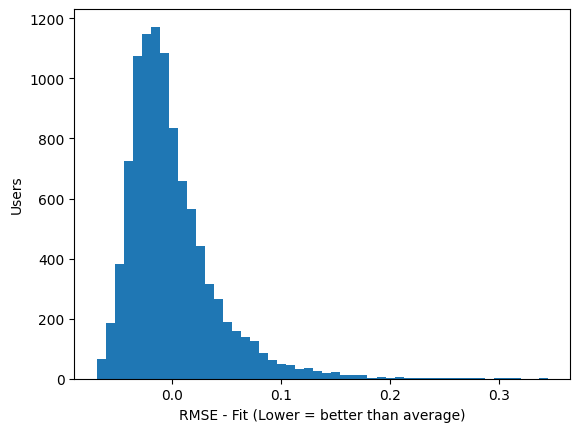

In [ ]:
ax = plt.axes()

ax.set_xlabel("RMSE - Fit (Lower = better than average)")
ax.set_ylabel("Users")

ax.hist(adjusted_loss, bins=50)